# Safety Dataset EDA and Modeling
by Prince Joseph Erneszer Javier

## Executive Summary

## Introduction

## About the Data

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle

from collections import Counter

import warnings
warnings.simplefilter('ignore')

### Loading the Data

In [2]:
# check the dataset folders
!ls data/safety/

data_dictionary.xlsx  features	labels


In [3]:
# read the data dictionary
xl = pd.ExcelFile("data/safety/data_dictionary.xlsx")

In [4]:
# sheet names
xl.sheet_names

['telematics data', 'labels']

In [47]:
# let's see the first sheet
xl.parse('telematics data')

,Unnamed: 0,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,description,trip id,accuracy inferred by GPS in meters,GPS bearing,accelerometer reading in x axis (m/s2),accelerometer reading in y axis (m/s2),accelerometer reading in z axis (m/s2),gyroscope reading in x axis (rad/s),gyroscope reading in y axis (rad/s),gyroscope reading in z axis (rad/s),time of the record by number of seconds,speed measured by GPS in m/s
1,samples,1,5,303.695,-0.00636292,-0.393829,-0.922379,"-0.020000606102604086,0.03205247529964867,-0.0...",NaN,NaN,0,0.57
2,NaN,1,10,325.39,0.183914,-0.355026,-0.92041,"-0.028598887998033916,0.025720543491876274,-0....",NaN,NaN,1,0.28
3,NaN,1,5,303.695,-0.00636292,-0.392944,-0.922226,"-0.01894040167264354,0.030980020328673762,-0.0...",NaN,NaN,2,0.57
4,NaN,1,10,324.23,0.165924,-0.332092,-0.920578,"-0.0577245492596855,0.002558232543130116,0.014...",NaN,NaN,3,0.28
5,NaN,1,5,303.695,-0.00642395,-0.392166,-0.924164,"-0.017865283540578553,0.03203915949419828,-0.0...",NaN,NaN,4,0.57
6,NaN,1,10,324.23,0.169724,-0.333694,-0.939575,"-0.04030587783391324,0.03112276576310201,-0.00...",NaN,NaN,5,0.28
7,NaN,1,5,303.695,-0.00480652,-0.391861,-0.923065,"-0.020006731373111267,0.03205726898961082,-0.0...",NaN,NaN,6,0.57
8,NaN,2,10,322.99,0.174759,-0.344498,-0.918839,"-0.00411618178082647,0.02562493600874243,0.004...",NaN,NaN,0,0.28
9,NaN,2,5,303.695,-0.00646973,-0.391953,-0.923889,"-0.0189390700920985,0.032050611086885616,-0.00...",NaN,NaN,1,0.57


In [46]:
# let's see the second sheet
xl.parse('labels')

,bookingID,label
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,0
9,10,0


In [7]:
# let's see the contents of features and labels folder
!ls data/safety/features

# there are many csvs, we either want to run this in Pyspark 
# or we can combine them into just one Pandas dataset

part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv


In [8]:
!ls data/safety/labels

part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv


In [9]:
# let's load one features csv, there are many csvs we either
_ = pd.read_csv("data/safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
_.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [243]:
# let's load the labels csv
labels = pd.read_csv("data/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

# drop duplicates
labels = labels.dropna()

# sort
labels.sort_values(by="bookingID", inplace=True)
labels.reset_index(drop=True, inplace=True)

labels.head()

,bookingID,label
0,0,0
1,1,1
2,2,1
3,4,1
4,6,0


In [11]:
# how many null
labels.isnull().sum()

bookingID    0
label        0
dtype: int64

In [12]:
# how many labels are there?
len(labels)

20018

In [13]:
# how many unique bookings are there?
len(labels.bookingID.unique())

20000

In [14]:
# load all paths into list
paths = glob.glob("data/safety/features/*.csv")

# let's combine all feature into one pandas dataframe
df_feats0 = pd.DataFrame()

for path in paths:
    _ = pd.read_csv(path, header="infer")
    df_feats0 = pd.concat([df_feats0, _])

In [15]:
df_feats0.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1657857376413,10.000,128.234833,0.780280,-9.869086,-0.019440,-0.143924,-0.016662,-0.016986,497.0,16.030001
1,25769803913,6.000,286.368225,9.086713,0.309390,-3.506772,0.008518,-0.006350,0.003299,120.0,2.089626
2,1434519076946,12.136,339.000000,0.946808,9.609665,2.311615,-0.011124,-0.320435,-0.062027,76.0,5.540000
3,283467841697,3.000,186.000000,0.900247,7.996878,5.286559,0.000874,-0.009702,0.020248,22.0,0.276720
4,481036337236,3.090,18.000000,0.045000,9.882000,0.173000,0.038839,-0.284030,-0.078576,1522.0,1.306365


In [16]:
df_feats0.shape

(16135561, 11)

In [17]:
# drop duplicates
df_feats0 = df_feats0.drop_duplicates()

In [18]:
# count null values
df_feats0.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
dtype: int64

In [19]:
# since there is only one label per bookingID, we engineer features per booking trip
# min, max, mean, std, skewness, kurtosis, length_of_trip, 

# sorting by booking number and seconds
df_feats0 = df_feats0.sort_values(by=["bookingID", "second"]).reset_index(drop=True)
df_feats0.head()

# save to csv df_feats0
df_feats0.to_csv("data/processed/df_feats0.csv", index=False)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [242]:
# load csv
df_feats0 = pd.read_csv("data/processed/df_feats0.csv")
df_feats0.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [262]:
# setting aside test data 5% of all booking IDs
num_test = int(len(df_feats0.bookingID.unique()) * 0.05)
print(num_test)

# select random booking IDs
test_bookingIDs = np.random.choice(df_feats0.bookingID.unique(), num_test, replace=False)
train_bookingIDs = [i for i in df_feats0.bookingID.unique() if i not in test_bookingIDs]
df_test = df_feats0[df_feats0.bookingID.isin(test_bookingIDs)]
df_train = df_feats0[df_feats0.bookingID.isin(train_bookingIDs)]

1000


In [275]:
# save to csv df_feats0
df_test.to_csv("data/processed/df_test.csv", index=False)
df_train.to_csv("data/processed/df_train.csv", index=False)

In [276]:
# load csv
df_test = pd.read_csv("data/processed/df_test.csv")
df_train = pd.read_csv("data/processed/df_train.csv")

In [277]:
df_train.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [278]:
df_test.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,124,3.291,235.0,0.644974,8.789276,1.732346,-0.037781,-0.046967,-0.021515,0.0,1.03
1,124,3.215,235.0,0.772400,9.392273,1.929749,0.015366,0.005249,0.023987,1.0,1.36
2,124,3.179,233.0,0.864517,9.772736,1.314194,0.014740,0.028168,0.082626,2.0,1.95
3,124,3.656,231.0,0.679672,8.870636,2.176208,0.001312,-0.012146,0.026428,3.0,3.23
4,124,3.905,231.0,0.381775,9.333649,1.790970,0.015671,0.013809,0.008408,4.0,3.83


In [279]:
from scipy.stats import kurtosis, skew

In [280]:
# we engineer feature, aggregating feature values per bookingID
# getting min, max, range, mean, std, skewness, and kurtosis

df_engg_feats = df_train.drop("second", axis=1)
df_engg_feats = df_engg_feats.groupby(by="bookingID", as_index=True).agg([np.min, np.max, np.ptp, np.mean, np.std, skew, kurtosis])
df_engg_feats.head()


Accuracy                                                           \
              amin    amax     ptp       mean       std      skew  kurtosis   
bookingID                                                                     
0          4.0      48.000  44.000  10.165339  3.855898  1.732696  8.764958   
1          3.0      7.709   4.709   3.718763   0.597933  1.259239  5.437314   
2          3.0      8.000   5.000   3.930626   1.117354  1.325234  0.930249   
4          10.0     10.000  0.000   10.000000  0.000000  0.000000 -3.000000   
6          3.0      12.000  9.000   4.586721   1.329545  1.697510  5.095780   

            Bearing                          ...    gyro_z            \
               amin        amax         ptp  ...       std      skew   
bookingID                                    ...                       
0          0.037464  359.979767  359.942302  ...  0.063685 -0.991564   
1          0.000000  337.000000  337.000000  ...  0.033838  0.811801   
2          1.000000  354.000000  353.000000  ...  0.036215  1.543345   
4          2.271227  353.855377  351.584150  ...  0.065927  0.547003   
6          0.000000  359.000000  359.000000  ...  0.057438 -0.034414   

                     Speed                                            \
            kurtosis  amin       amax        ptp      mean       std   
bookingID                                                              
0          20.752428 -1.0   22.946083  23.946083  8.994822  7.199919   
1          5.634003  -1.0   21.882141  22.882141  7.881588  7.059362   
2          12.962534  0.0   9.360483   9.360483   3.157213  2.897762   
4          7.147706   0.0   19.780001  19.780001  6.150996  5.595901   
6          6.984716   0.0   16.394695  16.394695  4.628921  5.314844   

                               
               skew  kurtosis  
bookingID                      
0          0.167588 -1.431322  
1          0.347213 -1.243763  
2          0.407362 -1.068416  
4          0.872207 -0.638173  
6          0.723716 -1.001236  

[5 rows x 63 columns]

In [281]:
# flatten column names
cols = [df_engg_feats.columns[i][0]+"_"+df_engg_feats.columns[i][1] for i in range(len(df_engg_feats.columns))]
cols

['Accuracy_amin',
 'Accuracy_amax',
 'Accuracy_ptp',
 'Accuracy_mean',
 'Accuracy_std',
 'Accuracy_skew',
 'Accuracy_kurtosis',
 'Bearing_amin',
 'Bearing_amax',
 'Bearing_ptp',
 'Bearing_mean',
 'Bearing_std',
 'Bearing_skew',
 'Bearing_kurtosis',
 'acceleration_x_amin',
 'acceleration_x_amax',
 'acceleration_x_ptp',
 'acceleration_x_mean',
 'acceleration_x_std',
 'acceleration_x_skew',
 'acceleration_x_kurtosis',
 'acceleration_y_amin',
 'acceleration_y_amax',
 'acceleration_y_ptp',
 'acceleration_y_mean',
 'acceleration_y_std',
 'acceleration_y_skew',
 'acceleration_y_kurtosis',
 'acceleration_z_amin',
 'acceleration_z_amax',
 'acceleration_z_ptp',
 'acceleration_z_mean',
 'acceleration_z_std',
 'acceleration_z_skew',
 'acceleration_z_kurtosis',
 'gyro_x_amin',
 'gyro_x_amax',
 'gyro_x_ptp',
 'gyro_x_mean',
 'gyro_x_std',
 'gyro_x_skew',
 'gyro_x_kurtosis',
 'gyro_y_amin',
 'gyro_y_amax',
 'gyro_y_ptp',
 'gyro_y_mean',
 'gyro_y_std',
 'gyro_y_skew',
 'gyro_y_kurtosis',
 'gyro_z_amin

In [282]:
df_engg_feats.columns = cols
df_engg_feats.reset_index(inplace=True)
df_engg_feats.head()

,bookingID,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,...,gyro_z_std,gyro_z_skew,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis
0,0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.037464,359.979767,...,0.063685,-0.991564,20.752428,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322
1,1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.000000,337.000000,...,0.033838,0.811801,5.634003,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763
2,2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,1.000000,354.000000,...,0.036215,1.543345,12.962534,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416
3,4,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,2.271227,353.855377,...,0.065927,0.547003,7.147706,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173
4,6,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000000,359.000000,...,0.057438,-0.034414,6.984716,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236


In [284]:
# add length of each trip
df_len = df_feats0.groupby(by="bookingID", as_index=True).agg(len).iloc[:, 0:1]
df_len.columns = ['trip_len']
df_len.reset_index(inplace=True)
df_len.head()

,bookingID,trip_len
0,0,1004.0
1,1,851.0
2,2,195.0
3,4,1094.0
4,6,1095.0


In [285]:
# merge along bookingID
df_engg_feats_2 = pd.merge(df_engg_feats, df_len, how="inner", on="bookingID")
df_engg_feats_2.head()

,bookingID,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,...,gyro_z_skew,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len
0,0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.037464,359.979767,...,-0.991564,20.752428,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,1004.0
1,1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.000000,337.000000,...,0.811801,5.634003,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,851.0
2,2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,1.000000,354.000000,...,1.543345,12.962534,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,195.0
3,4,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,2.271227,353.855377,...,0.547003,7.147706,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,1094.0
4,6,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000000,359.000000,...,-0.034414,6.984716,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,1095.0


In [ ]:
# # save df_engg_feats to csv
# # Optional
# df_engg_feats_2.to_csv("data/processed/engg_feats_agg.csv", index=True)

In [ ]:
# # left join with labels (no aggregating)
# df_feats_labels = pd.merge(df_feats, labels, how="outer", on="bookingID")

# # save to CSV
# save_path = "data/feats_labels.csv"
# df_feats_labels.to_csv(save_path, index=False)

In [286]:
# left join with labels (aggregating and feature engineering)
df_engg_feats_labels = pd.merge(df_engg_feats_2, labels, how="inner", on="bookingID")

# save to CSV
save_path = "data/processed/engg_feats_labels.csv"
df_engg_feats_labels.to_csv(save_path, index=False)

In [287]:
df_engg_feats_labels.shape

(19016, 66)

In [288]:
df_engg_feats_labels.head()

,bookingID,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,...,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len,label
0,0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.037464,359.979767,...,20.752428,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,1004.0,0
1,1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.000000,337.000000,...,5.634003,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,851.0,1
2,2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,1.000000,354.000000,...,12.962534,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,195.0,1
3,4,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,2.271227,353.855377,...,7.147706,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,1094.0,1
4,6,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000000,359.000000,...,6.984716,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,1095.0,0


In [289]:
df_engg_feats_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19016 entries, 0 to 19015
Data columns (total 66 columns):
bookingID                  19016 non-null int64
Accuracy_amin              19016 non-null float64
Accuracy_amax              19016 non-null float64
Accuracy_ptp               19016 non-null float64
Accuracy_mean              19016 non-null float64
Accuracy_std               19016 non-null float64
Accuracy_skew              19016 non-null float64
Accuracy_kurtosis          19016 non-null float64
Bearing_amin               19016 non-null float64
Bearing_amax               19016 non-null float64
Bearing_ptp                19016 non-null float64
Bearing_mean               19016 non-null float64
Bearing_std                19016 non-null float64
Bearing_skew               19016 non-null float64
Bearing_kurtosis           19016 non-null float64
acceleration_x_amin        19016 non-null float64
acceleration_x_amax        19016 non-null float64
acceleration_x_ptp         19016 non-null f

In [290]:
# load saved combined dataset
save_path = "data/processed/engg_feats_labels.csv"
df_engg_feats_labels0 = pd.read_csv(save_path)
df_engg_feats_labels0.drop("bookingID", axis=1, inplace=True)
df_engg_feats_labels0.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,Bearing_ptp,...,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len,label
0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.037464,359.979767,359.942302,...,20.752428,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,1004.0,0
1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.000000,337.000000,337.000000,...,5.634003,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,851.0,1
2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,1.000000,354.000000,353.000000,...,12.962534,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,195.0,1
3,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,2.271227,353.855377,351.584150,...,7.147706,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,1094.0,1
4,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000000,359.000000,359.000000,...,6.984716,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,1095.0,0


In [291]:
df_feats = df_engg_feats_labels0.drop("label", axis=1)
df_feats.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,Bearing_ptp,...,gyro_z_skew,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len
0,4.0,48.000,44.000,10.165339,3.855898,1.732696,8.764958,0.037464,359.979767,359.942302,...,-0.991564,20.752428,-1.0,22.946083,23.946083,8.994822,7.199919,0.167588,-1.431322,1004.0
1,3.0,7.709,4.709,3.718763,0.597933,1.259239,5.437314,0.000000,337.000000,337.000000,...,0.811801,5.634003,-1.0,21.882141,22.882141,7.881588,7.059362,0.347213,-1.243763,851.0
2,3.0,8.000,5.000,3.930626,1.117354,1.325234,0.930249,1.000000,354.000000,353.000000,...,1.543345,12.962534,0.0,9.360483,9.360483,3.157213,2.897762,0.407362,-1.068416,195.0
3,10.0,10.000,0.000,10.000000,0.000000,0.000000,-3.000000,2.271227,353.855377,351.584150,...,0.547003,7.147706,0.0,19.780001,19.780001,6.150996,5.595901,0.872207,-0.638173,1094.0
4,3.0,12.000,9.000,4.586721,1.329545,1.697510,5.095780,0.000000,359.000000,359.000000,...,-0.034414,6.984716,0.0,16.394695,16.394695,4.628921,5.314844,0.723716,-1.001236,1095.0


## EDA

In [5]:
# basic_stats = df_feats.describe().T
# basic_stats

In [6]:
# # we look at scatterplots between the features using a sample of 100 points
# df_sample = df_engg_feats_labels0.sample(n=100)
# sns.pairplot(df_sample, hue='label')

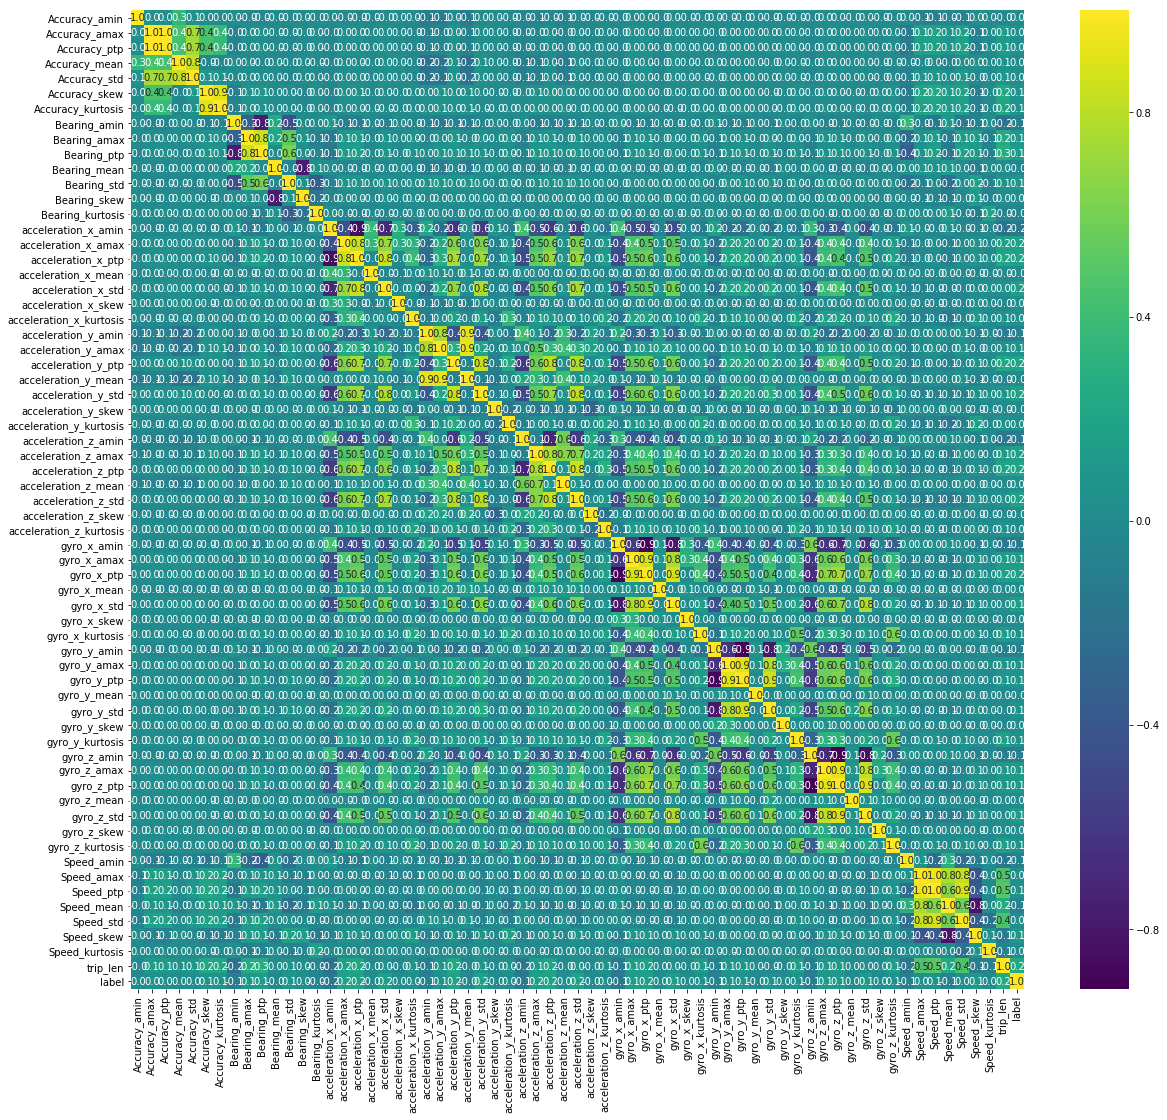

In [292]:
# we look at the correlations between the features using a covariance matrix
plt.figure(figsize=(20, 18))

df_corr_matrix = pd.DataFrame(np.corrcoef(df_engg_feats_labels0.values.T), 
                              index=df_engg_feats_labels0.columns, columns=df_engg_feats_labels0.columns)
# heatmap
sns.heatmap(df_corr_matrix, annot=True, fmt='0.1f', cmap="viridis")

Text(0,0.5,'feature')

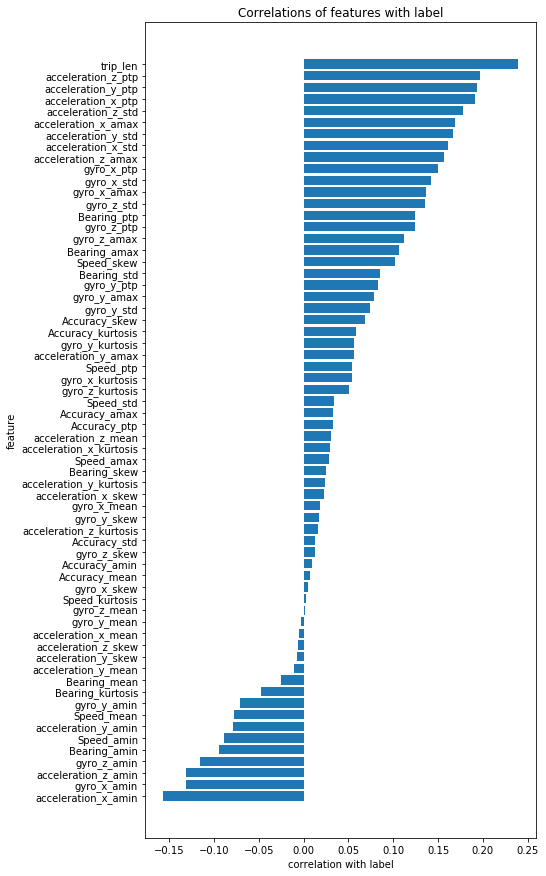

In [293]:
plt.figure(figsize=(7, 15))

# barplot
y = df_corr_matrix.iloc[:, -1].drop("label").values
x = df_corr_matrix.iloc[:, [-1]].drop("label").index
inds = np.argsort(y)
y = y[inds]
x = x[inds]
plt.barh(x, y)
plt.title("Correlations of features with label")
plt.xlabel("correlation with label")
plt.ylabel("feature")

In [8]:
# # boxplots
# plt.semilogy()
# sns.boxplot(x="label", y="Accuracy", data=df_feats_labels)
# plt.show()

In [9]:
# # boxplots
# data = df_feats_labels

# sns.distplot()
# plt.show()

Counter({0: 14279, 1: 4737})


Text(0,0.5,'counts')

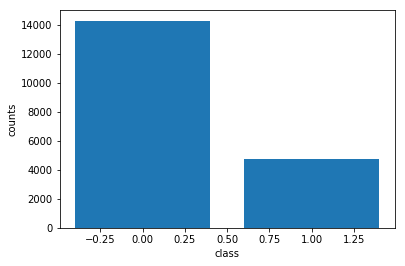

In [294]:
# number of samples per class
print(Counter(df_engg_feats_labels0.label))
y = Counter(df_engg_feats_labels0.label).values()
x = Counter(df_engg_feats_labels0.label).keys()

plt.bar(x, y)
plt.xlabel("class")
plt.ylabel("counts")

## Preprocessing for Models

In [295]:
from sklearn.utils import shuffle

In [296]:
# equalizing the number of classes
# getting number of samples for class 1 (lower)
num_per_class = len(df_engg_feats_labels0[df_engg_feats_labels0.label == 1])
print(num_per_class)

# getting a sample for class 1
df_labels_1 = df_engg_feats_labels0[df_engg_feats_labels0.label == 1].sample(n=num_per_class, replace=False, random_state=42)

# getting a sample for class 0
df_labels_0 = df_engg_feats_labels0[df_engg_feats_labels0.label == 0].sample(n=num_per_class, replace=False, random_state=42)
print(len(df_labels_0))

4737
4737


In [297]:
# concatenate and shuffle
df_for_ml = shuffle(pd.concat([df_labels_1, df_labels_0]), random_state=42).reset_index(drop=True)

# shape
df_for_ml.shape

(9474, 65)

Counter({1: 4737, 0: 4737})


Text(0,0.5,'counts')

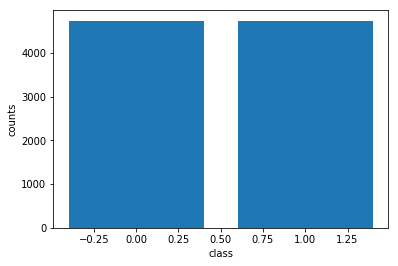

In [298]:
# number of samples per class
print(Counter(df_for_ml.label))
y = Counter(df_for_ml.label).values()
x = Counter(df_for_ml.label).keys()

plt.bar(x, y)
plt.xlabel("class")
plt.ylabel("counts")

In [299]:
# no need for train test splitting since we will be using kfold validation
# we have already set aside a 5% test set above

In [305]:
X_train = df_for_ml.drop("label", axis=1)
y_train = df_for_ml["label"]

In [10]:
# # saving train and test datasets to CSV files
# X_train.to_csv(f"data/processed/X_train_{num_per_class}.csv", index=False)
# pd.DataFrame(y_train).to_csv(f"data/processed/y_train_{num_per_class}.csv", index=False)
# X_test.to_csv(f"data/processed/X_test_{num_per_class}.csv", index=False)
# pd.DataFrame(y_test).to_csv(f"data/processed/y_test_{num_per_class}.csv", index=False)

In [186]:
# # loading CSVs
# X_train = pd.read_csv(f"data/processed/X_train_{num_per_class}.csv") 
# X_test = pd.read_csv(f"data/processed/X_test_{num_per_class}.csv")
# y_train = pd.read_csv(f"data/processed/y_train_{num_per_class}.csv").values.flatten()
# y_test = pd.read_csv(f"data/processed/y_test_{num_per_class}.csv").values.flatten()

In [306]:
X_train.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,Bearing_ptp,...,gyro_z_skew,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len
0,3.198,5.5,2.302,3.894792,0.893479,0.814521,-1.091455,68.000000,358.000000,290.000000,...,-0.065456,2.255210,0.0,17.351286,17.351286,2.504549,4.266055,1.843148,2.462901,630.0
1,10.000,10.0,0.000,10.000000,0.000000,0.000000,-3.000000,0.111948,359.968109,359.856161,...,0.057257,4.369828,0.0,26.559999,26.559999,11.350061,9.052287,0.157259,-1.598451,824.0
2,3.000,4.6,1.600,3.744292,0.337499,-1.529162,0.906031,1.000000,358.000000,357.000000,...,-1.367902,4.965753,0.0,16.400080,16.400080,9.447364,4.975110,-0.563249,-0.972619,240.0
3,3.000,24.0,21.000,4.262047,1.120936,5.060578,54.870297,0.000000,357.000000,357.000000,...,0.013594,1.443648,0.0,26.564178,26.564178,15.719868,7.639410,-0.636798,-0.791403,2535.0
4,3.000,1476.0,1473.000,15.819278,114.035648,10.749030,118.580033,0.000000,356.000000,356.000000,...,-0.774117,6.087560,-1.0,23.463644,24.463644,7.202245,7.820243,0.586466,-1.179417,805.0


In [307]:
X_test.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,Bearing_ptp,...,gyro_z_skew,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len
3593,3.000,6.000,3.000,3.611635,0.584045,0.962243,1.782225,4.000000,359.000000,355.000000,...,0.395961,2.607101,-0.154257,14.362490,14.516747,4.465723,4.714099,0.754310,-0.909711,315.0
2273,3.000,12.000,9.000,3.787952,1.098989,2.905235,12.662710,3.000000,359.000000,356.000000,...,-0.233563,23.487177,0.000000,16.405163,16.405163,3.745617,4.922218,1.181117,0.191915,598.0
6137,3.000,34.011,31.011,7.739821,4.555591,2.557927,8.237379,0.000000,359.000000,359.000000,...,-0.360469,6.389712,-1.000000,22.230000,23.230000,9.908951,8.138008,-0.000933,-1.649413,1535.0
967,4.953,32.000,27.047,11.102142,4.179304,0.977912,2.183022,0.000000,352.000000,352.000000,...,0.337897,12.028380,-1.000000,19.542374,20.542374,3.687574,4.595936,1.624406,2.265130,351.0
4847,5.000,10.000,5.000,8.775578,2.150803,-1.186532,-0.592141,16.009979,354.404572,338.394592,...,5.465801,118.764184,0.160000,24.900000,24.740000,11.674541,6.726955,0.146550,-0.998603,1515.0


In [308]:
y_train[:5]

0    1
1    1
2    0
3    1
4    0
Name: label, dtype: int64

In [309]:
y_test[:5]

3593    1
2273    1
6137    1
967     0
4847    0
Name: label, dtype: int64

In [310]:
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmsc = MinMaxScaler()
stdsc = StandardScaler()

In [311]:
# scale the training set minmax/standard
scaler = "minmax"

if scaler == "std":
    sc = stdsc.fit(X_train)
else:
    sc = mmsc.fit(X_train)
    
# save scaler
scalerfile = f'scalers/{scaler}.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
    
X_train = sc.transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_cols)

X_train.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,Bearing_ptp,...,gyro_z_skew,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len
0,0.001732,0.000371,0.000380,0.001324,0.000365,0.238994,0.000728,0.224194,0.994446,0.805570,...,0.492099,0.002258,0.080199,0.123148,0.116437,0.127702,0.323489,0.496336,0.039251,0.068539
1,0.006545,0.001114,0.000000,0.005344,0.000000,0.226189,0.000000,0.000369,0.999913,0.999619,...,0.493679,0.003621,0.080199,0.184943,0.178233,0.450022,0.686422,0.402090,0.010070,0.094611
2,0.001592,0.000223,0.000264,0.001225,0.000138,0.202149,0.001490,0.003297,0.994446,0.991685,...,0.475323,0.004005,0.080199,0.116764,0.110054,0.380690,0.377255,0.361812,0.014567,0.016127
3,0.001592,0.003424,0.003469,0.001566,0.000458,0.305747,0.022072,0.000000,0.991668,0.991685,...,0.493117,0.001734,0.080199,0.184971,0.178261,0.609252,0.579285,0.357700,0.015869,0.324553
4,0.001592,0.243038,0.243350,0.009175,0.046594,0.395175,0.046372,0.000000,0.988890,0.988907,...,0.482971,0.004728,0.040100,0.164165,0.164165,0.298880,0.592998,0.426084,0.013081,0.092058


In [312]:
# PCA?
# are there visible clusters if we perform and look at it in 3d?
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [313]:
len(X.columns)

64

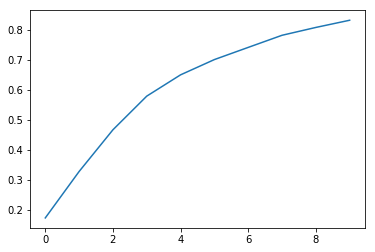

array([0.17363376, 0.32813047, 0.46697685, 0.57898334, 0.64986935,
       0.70067061, 0.74119993, 0.78152253, 0.80764253, 0.8315906 ])

In [314]:
# explained variance ratio of first 10 principal components
# first 10 principal components explain 80% of the variance
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]))
plt.show()
np.cumsum(pca.explained_variance_ratio_[:10])

In [315]:
# plot in 3D with label colors
principalDf.iloc[:, 0:3].head()

,0,1,2
0,0.086870,0.124302,0.241725
1,0.143551,-0.053402,-0.439160
2,-0.137824,-0.053630,0.056933
3,0.028562,-0.252146,-0.026605
4,-0.102442,-0.154959,0.012068


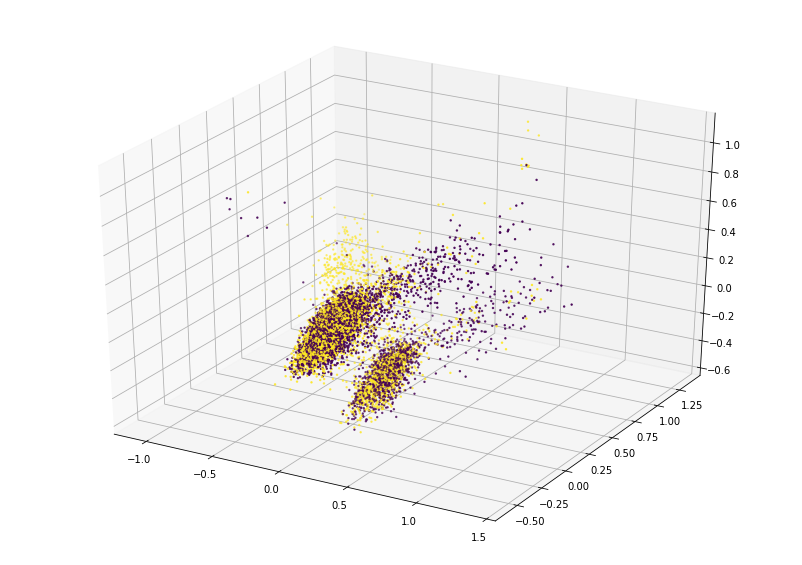

In [316]:
# plotting on the first 3 principal components
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')

c = y_train
ax.scatter3D(principalDf.iloc[:, 0], principalDf.iloc[:, 1], principalDf.iloc[:, 2], c=c, cmap='viridis', s=2)


## Accuracy to Beat - PCC

In [317]:
# proportional chance criterion
state_counts = Counter(y_train)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
num = (df_state[0] / df_state[0].sum())**2
pcc = num.sum()
pcc

0.5

## Machine Learning Models

In [318]:
# loading packages
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [319]:
models_results = {'model':[], 'valid_acc':[], 'params':[]}
n_jobs = 12

### Logistic Regression

In [320]:
param_grid = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100]}

clf = LogisticRegression()

logreg = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
logreg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6240236436563226
Best parameters: {'C': 0.5, 'penalty': 'l2'}


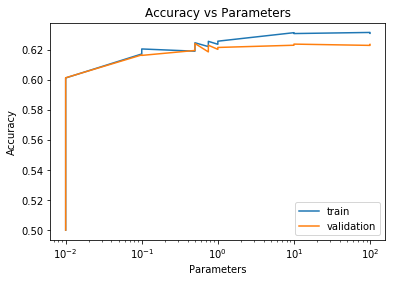

In [321]:
# calculate results
model_name = 'log_reg'
model = logreg
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Linear SVC L1

In [322]:
param_grid = {'penalty':['l1'], 'dual':[False], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100, 1000]}

clf = LinearSVC()

lsvcl1 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
lsvcl1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'penalty': ['l1'], 'dual': [False], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6237069875448596
Best parameters: {'C': 100, 'dual': False, 'penalty': 'l1'}


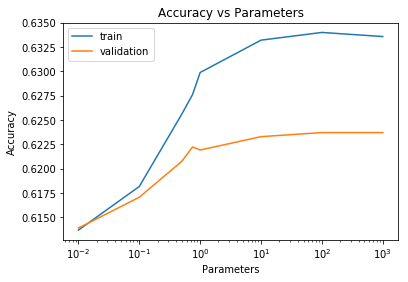

In [323]:
# calculate results
model_name = 'linear_svc_l1'
model = lsvcl1
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Linear SVC L2

In [324]:
param_grid = {'penalty':['l2'], 'loss':['hinge'], 'C':[0.01, 0.1, 0.5, 0.75, 1., 10, 100]}

clf = LinearSVC()

lsvcl2 = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
lsvcl2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'penalty': ['l2'], 'loss': ['hinge'], 'C': [0.01, 0.1, 0.5, 0.75, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6270846527337978
Best parameters: {'C': 1.0, 'loss': 'hinge', 'penalty': 'l2'}


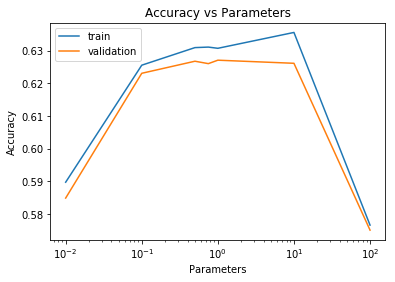

In [325]:
# calculate results
model_name = 'linear_svc_l2'
model = lsvcl2
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.coef_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Nonlinear SVC

In [326]:
param_grid = {'C':[0.1, 0.5, 0.75, 1., 10, 100, 1000, 2000]}

clf = SVC()

svc = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
svc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'C': [0.1, 0.5, 0.75, 1.0, 10, 100, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6334177749630567
Best parameters: {'C': 1000}


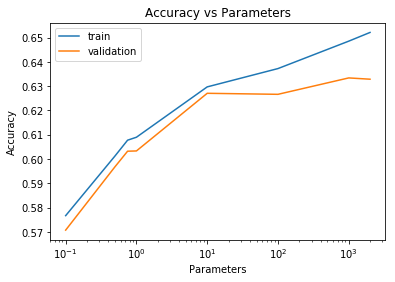

In [327]:
# calculate results
model_name = 'svc'
model = svc
results = pd.DataFrame(model.cv_results_)
params = results.param_C
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

### GBM

In [328]:
param_grid = {'learning_rate':[0.01, 0.05, 0.1], "n_estimators":[500], "max_depth":[2, 3, 4, 5]}

clf = GradientBoostingClassifier()

gbm = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
gbm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [500], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6312011821828162
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


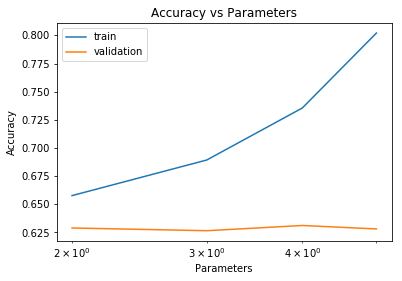

In [329]:
# calculate results
model_name = 'gbm'
model = gbm
results = pd.DataFrame(model.cv_results_)
params = results[results.param_learning_rate==0.01].param_max_depth
train_score = results[results.param_learning_rate==0.01].mean_train_score
valid_score = results[results.param_learning_rate==0.01].mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Random Forest

In [330]:
param_grid = {'min_samples_split':[2, 3, 4], "max_depth":[2, 3, 4, 5]}

clf = RandomForestClassifier()

rf = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6207515305045387
Best parameters: {'max_depth': 4, 'min_samples_split': 3}


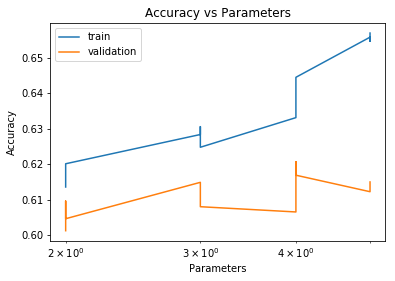

In [331]:
# calculate results
model_name = 'rf'
model = rf
results = pd.DataFrame(model.cv_results_)
params = results.param_max_depth
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Decision Tree

In [332]:
param_grid = {'min_samples_split':[2, 3, 4], "max_depth":[2, 3, 4, 5]}

clf = DecisionTreeClassifier()

dt = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
dt.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'min_samples_split': [2, 3, 4], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.6027021321511505
Best parameters: {'max_depth': 2, 'min_samples_split': 2}


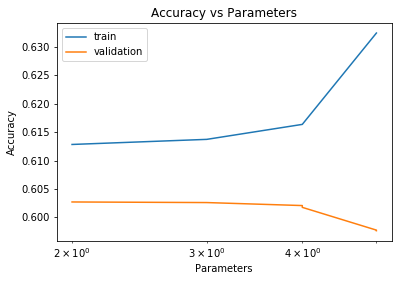

In [333]:
# calculate results
model_name = 'dt'
model = dt
results = pd.DataFrame(model.cv_results_)
params = results.param_max_depth
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

# save feature importances
file = model.best_estimator_.feature_importances_
filepath = f'results/{model_name}_{scaler}_feature_importances.sav'
pickle.dump(file, open(filepath, 'wb'))

### Naive Bayes

In [334]:
param_grid = {'var_smoothing':[1e-9, 1e-5, 1e-1]}
clf = GaussianNB()

nb = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)
nb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid={'var_smoothing': [1e-09, 1e-05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best validation accuracy: 0.55256491450285
Best parameters: {'var_smoothing': 1e-05}


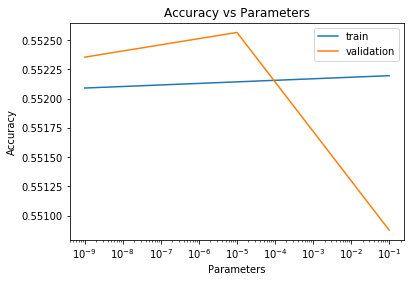

In [335]:
# calculate results
model_name = 'nb'
model = nb
results = pd.DataFrame(model.cv_results_)
params = results.param_var_smoothing
train_score = results.mean_train_score
valid_score = results.mean_test_score

# plot
plt.semilogx()
plt.plot(params, train_score, label="train")
plt.plot(params, valid_score, label="validation")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Parameters")
plt.legend()

# saving to dictionary of models and results
models_results["model"] += [model_name]
models_results["params"] += [model.best_params_]
models_results["valid_acc"] += [model.best_score_]

# print accuracies and parameters
print("Best validation accuracy:", model.best_score_)
print("Best parameters:", model.best_params_)

# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

# save best_params
file = model.best_params_
filepath = f'results/{model_name}_{scaler}_best_params.sav'
pickle.dump(file, open(filepath, 'wb'))

In [336]:
results = pd.DataFrame(models_results).sort_values(by="valid_acc", ascending=False)
results.drop_duplicates(subset="valid_acc", inplace=True)

In [337]:
# save to csv
results.to_csv(f"results/ml_results_{scaler}.csv", index=False)

In [338]:
# results from standard scaler
pd.set_option('display.max_colwidth', -1)
pd.read_csv("results/ml_results_std.csv").drop_duplicates(subset="model")

,model,valid_acc,params
0,linear_svc_l2,0.644581,"{'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'}"
1,svc,0.642048,{'C': 0.5}
2,linear_svc_l1,0.641381,"{'C': 0.1, 'dual': False, 'penalty': 'l1'}"
4,log_reg,0.640181,"{'C': 1.0, 'penalty': 'l1'}"
6,gbm,0.639915,"{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}"
7,rf,0.630316,"{'max_depth': 4, 'min_samples_split': 4}"
8,dt,0.620717,"{'max_depth': 5, 'min_samples_split': 3}"
9,nb,0.558059,{'var_smoothing': 1e-09}


In [339]:
# results from minmax scaler
pd.set_option('display.max_colwidth', -1)
pd.read_csv("results/ml_results_minmax.csv").drop_duplicates(subset="model")

,model,valid_acc,params
0,svc,0.633418,{'C': 1000}
1,gbm,0.631201,"{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}"
2,linear_svc_l2,0.627085,"{'C': 1.0, 'loss': 'hinge', 'penalty': 'l2'}"
3,log_reg,0.624024,"{'C': 0.5, 'penalty': 'l2'}"
4,linear_svc_l1,0.623707,"{'C': 100, 'dual': False, 'penalty': 'l1'}"
5,rf,0.620752,"{'max_depth': 4, 'min_samples_split': 3}"
6,dt,0.602702,"{'max_depth': 2, 'min_samples_split': 2}"
7,nb,0.552565,{'var_smoothing': 1e-05}


### Most Predictive Features According to the Best ML Model

<BarContainer object of 64 artists>

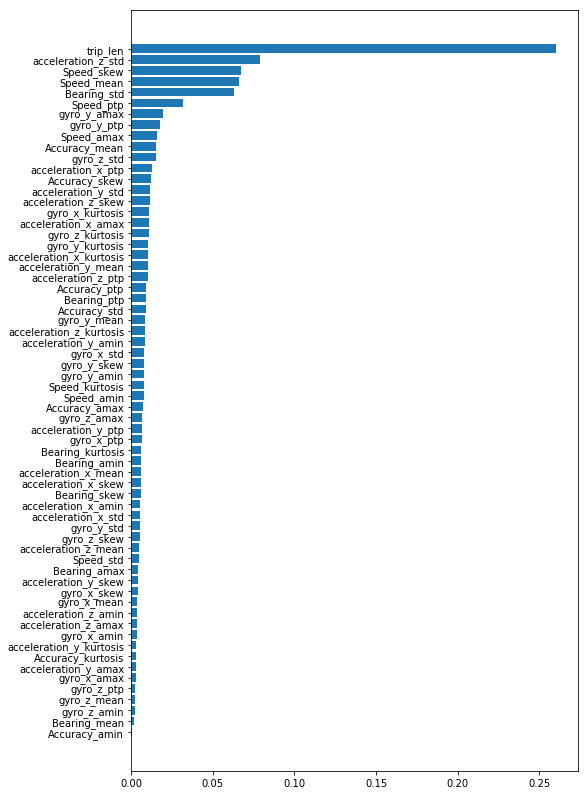

In [340]:
# GBM can be used for feature importances
filepath = f'results/gbm_{scaler}_feature_importances.sav'
feature_importances = pickle.load(open(filepath, 'rb')).flatten()

plt.figure(figsize=(8, 14))
y = feature_importances
inds = np.argsort(y)
y = y[inds]
x = feature_cols[inds]
plt.barh(x, y)

## Incremental Adding of Features from Most Predictive

In [341]:
models_results_b = {"features":[], "model":[], "params":[], "valid_acc":[]}

In [342]:
# feats from most important down
top_feats = x[::-1]
top_feats

Index(['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_mean',
       'Bearing_std', 'Speed_ptp', 'gyro_y_amax', 'gyro_y_ptp', 'Speed_amax',
       'Accuracy_mean', 'gyro_z_std', 'acceleration_x_ptp', 'Accuracy_skew',
       'acceleration_y_std', 'acceleration_z_skew', 'gyro_x_kurtosis',
       'acceleration_x_amax', 'gyro_z_kurtosis', 'gyro_y_kurtosis',
       'acceleration_x_kurtosis', 'acceleration_y_mean', 'acceleration_z_ptp',
       'Accuracy_ptp', 'Bearing_ptp', 'Accuracy_std', 'gyro_y_mean',
       'acceleration_z_kurtosis', 'acceleration_y_amin', 'gyro_x_std',
       'gyro_y_skew', 'gyro_y_amin', 'Speed_kurtosis', 'Speed_amin',
       'Accuracy_amax', 'gyro_z_amax', 'acceleration_y_ptp', 'gyro_x_ptp',
       'Bearing_kurtosis', 'Bearing_amin', 'acceleration_x_mean',
       'acceleration_x_skew', 'Bearing_skew', 'acceleration_x_amin',
       'acceleration_x_std', 'gyro_y_std', 'gyro_z_skew',
       'acceleration_z_mean', 'Speed_std', 'Bearing_amax',
       'acceleration_y

### Linear SVC L2

In [343]:
param_path = f"results/linear_svc_l2_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))

param_grid = {k:[v] for k, v in best_params.items()}
clf = LinearSVC()
lsvcl2_b = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_b = []
best_score = 0

model = lsvcl2_b
model_name = 'linear_svc_l2_b'

# checking features one by one
for i in range(len(top_feats)):
    feats_b += [top_feats[i]]
    X_train_b = X_train[feats_b]

    model.fit(X_train_b, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_b = feats_b[:-1]

models_results_b["features"] += [feats_b]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [best_score] 
            
print(feats_b)
# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5954190415875026
Best validation accuracy: 0.6141017521638168
Best validation accuracy: 0.6202237703187672
Best validation accuracy: 0.6209626345788474
Best validation accuracy: 0.6215959468017733
Best validation accuracy: 0.6222292590246992
Best validation accuracy: 0.6248680599535571
Best validation accuracy: 0.6252902681021744
Best validation accuracy: 0.6256069242136373
Best validation accuracy: 0.6260291323622545
Best validation accuracy: 0.6265568925480262
Best validation accuracy: 0.6268735486594891
Best validation accuracy: 0.6270846527337978
Best validation accuracy: 0.6277179649567237
Best validation accuracy: 0.6279290690310323
Best validation accuracy: 0.6280346210681866
Best validation accuracy: 0.6282457251424952
Best validation accuracy: 0.6284568292168039
Best validation accuracy: 0.6291956934768841
['trip_len', 'acceleration_z_std', 'Speed_skew', 'Bearing_std', 'Speed_ptp', 'Accuracy_mean', 'gyro_z_std', 'acceleration_x_ptp', 'Accuracy_skew'

### Nonlinear SVC

In [344]:
param_path = f"results/svc_{scaler}_best_params.sav"
best_params = pickle.load(open(param_path, 'rb'))
param_grid = {k:[v] for k, v in best_params.items()}

clf = SVC()
svc_b = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_b = []
best_score = 0

model = svc_b
model_name = 'svc_b'

# checking features one by one
for i in range(len(top_feats)):
    feats_b += [top_feats[i]]
    X_train_b = X_train[feats_b]

    model.fit(X_train_b, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_b = feats_b[:-1]

models_results_b["features"] += [feats_b]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [best_score] 
            
print(feats_b)
# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5881359510238547
Best validation accuracy: 0.608507494194638
Best validation accuracy: 0.6205404264302301
Best validation accuracy: 0.625818028287946
Best validation accuracy: 0.6284568292168039
Best validation accuracy: 0.6296179016255014
Best validation accuracy: 0.6297234536626557
Best validation accuracy: 0.6303567658855815
Best validation accuracy: 0.6312011821828162
Best validation accuracy: 0.6317289423685877
Best validation accuracy: 0.632467806628668
Best validation accuracy: 0.6326789107029765
Best validation accuracy: 0.6329955668144395
Best validation accuracy: 0.6343677432974456
Best validation accuracy: 0.6345788473717543
Best validation accuracy: 0.6347899514460629
['trip_len', 'acceleration_z_std', 'Speed_skew', 'Speed_ptp', 'gyro_y_amax', 'Speed_amax', 'Accuracy_mean', 'Accuracy_skew', 'acceleration_x_amax', 'acceleration_y_mean', 'Accuracy_std', 'acceleration_z_mean', 'Speed_std', 'Bearing_amax', 'gyro_x_amin', 'gyro_z_mean']


### GBM

In [ ]:
param_grid = {k:[v] for k, v in gbm.best_params_.items()}

clf = GradientBoostingClassifier()

gbm_b = GridSearchCV(clf, param_grid = param_grid, return_train_score=True, cv=3, n_jobs=n_jobs)

valid_accs = []
feats_b = []
best_score = 0

model = gbm_b
model_name = 'gbm_b'

# checking features one by one
for i in range(len(top_feats)):
    feats_b += [top_feats[i]]
    X_train_b = X_train[feats_b]

    model.fit(X_train_b, y_train)

    # calculate results
    results = pd.DataFrame(model.cv_results_)
    valid_score = results.mean_test_score.values[0]

    if valid_score > best_score:
        best_score = valid_score
        valid_accs.append(valid_score)

        # print accuracies and parameters
        print("Best validation accuracy:", best_score)
        
    else:
        feats_b = feats_b[:-1]

models_results_b["features"] += [feats_b]
models_results_b["model"] += [model_name]
models_results_b["params"] += [model.best_params_]
models_results_b["valid_acc"] += [best_score] 
            
print(feats_b)
# save the model to disk
filename = f'models/{model_name}_{scaler}.sav'
pickle.dump(model, open(filename, 'wb'))

Best validation accuracy: 0.5875026388009289
Best validation accuracy: 0.6058686932657801
Best validation accuracy: 0.6173738653156006
Best validation accuracy: 0.6199071142073042
Best validation accuracy: 0.6260291323622545
Best validation accuracy: 0.627823516993878
Best validation accuracy: 0.62982900569981
Best validation accuracy: 0.6300401097741186
Best validation accuracy: 0.631834494405742
Best validation accuracy: 0.6326789107029765
Best validation accuracy: 0.6339455351488283
Best validation accuracy: 0.6345788473717543


In [ ]:
results_b = pd.DataFrame(models_results_b).sort_values(by="valid_acc", ascending=False)
results_b.drop_duplicates(subset="valid_acc", inplace=True)
results_b.iloc[:, 1:]

In [ ]:
# save to csv
results_b.to_csv(f"results/ml_results_b_{scaler}.csv", index=False)

## Neural Networks